1. BALANCE : Balance amount left in customers account to make purchases
1. BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1
1. PURCHASES : Amount of purchases made from account
1. PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1
1. ONEOFF_PURCHASES : Maximum purchase amount done in one-go
1. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go
1. INSTALLMENTS_PURCHASES : Amount of purchase done in installment
1. CASH_ADVANCE : Cash in advance given by the user
1. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done
1. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
1. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
1. PURCHASES_TRX : Number of purchase transactions made
1. CREDIT_LIMIT : Limit of Credit Card for user
1. PAYMENTS : Amount of Payment done by user
1. MINIMUM_PAYMENTS : Minimum amount of payments made by user
1. PRCFULLPAYMENT : Percent of full payment paid by user
1. TENURE : Tenure of credit card service for user

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style as style
%matplotlib inline

import warnings
warnings.simplefilter("ignore")
    
# read dataset
df = pd.read_csv('data_credit_card_customer_seg.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Exploration

In [3]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
df.shape

(8950, 18)

In [5]:
df.size

161100

In [6]:
df.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

People with 6 to 12 months repayment period 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Preparation & Cleaning

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Let's try to fill CREDIT_LIMIT column using mean
df['CREDIT_LIMIT'].fillna(int(df['CREDIT_LIMIT'].mean()), inplace=True)

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

313(3.5%) data were missing in MINIMUM_PAYMENTS column. Let's do it later 

In [11]:
# drop unnecessary columns
df = df.drop(columns=['CUST_ID'],axis=1)

Customer ID seems to be an unique id for each customer and hence won't play any role in determining the cluster.

In [12]:
# round off all the decimal values in the dataframe to 2 decimal places
df = df.round(2)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.00,12
1,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,0.22,12
2,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.00,12
3,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,NaN,0.00,12
4,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.00,12


# Exploratory Data Analysis

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474826,2081.531851,0.00,128.2800,873.385,2054.1375,19043.14
BALANCE_FREQUENCY,8950.0,0.877426,0.237169,0.00,0.8900,1.000,1.0000,1.00
PURCHASES,8950.0,1003.204834,2136.634782,0.00,39.6350,361.280,1110.1300,49039.57
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.00,0.0000,38.000,577.4050,40761.25
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.00,0.0000,89.000,468.6375,22500.00
CASH_ADVANCE,8950.0,978.871102,2097.163869,0.00,0.0000,0.000,1113.8225,47137.21
PURCHASES_FREQUENCY,8950.0,0.490217,0.401678,0.00,0.0800,0.500,0.9200,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202177,0.298555,0.00,0.0000,0.080,0.3000,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364553,0.397623,0.00,0.0000,0.170,0.7500,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.134911,0.200262,0.00,0.0000,0.000,0.2200,1.50


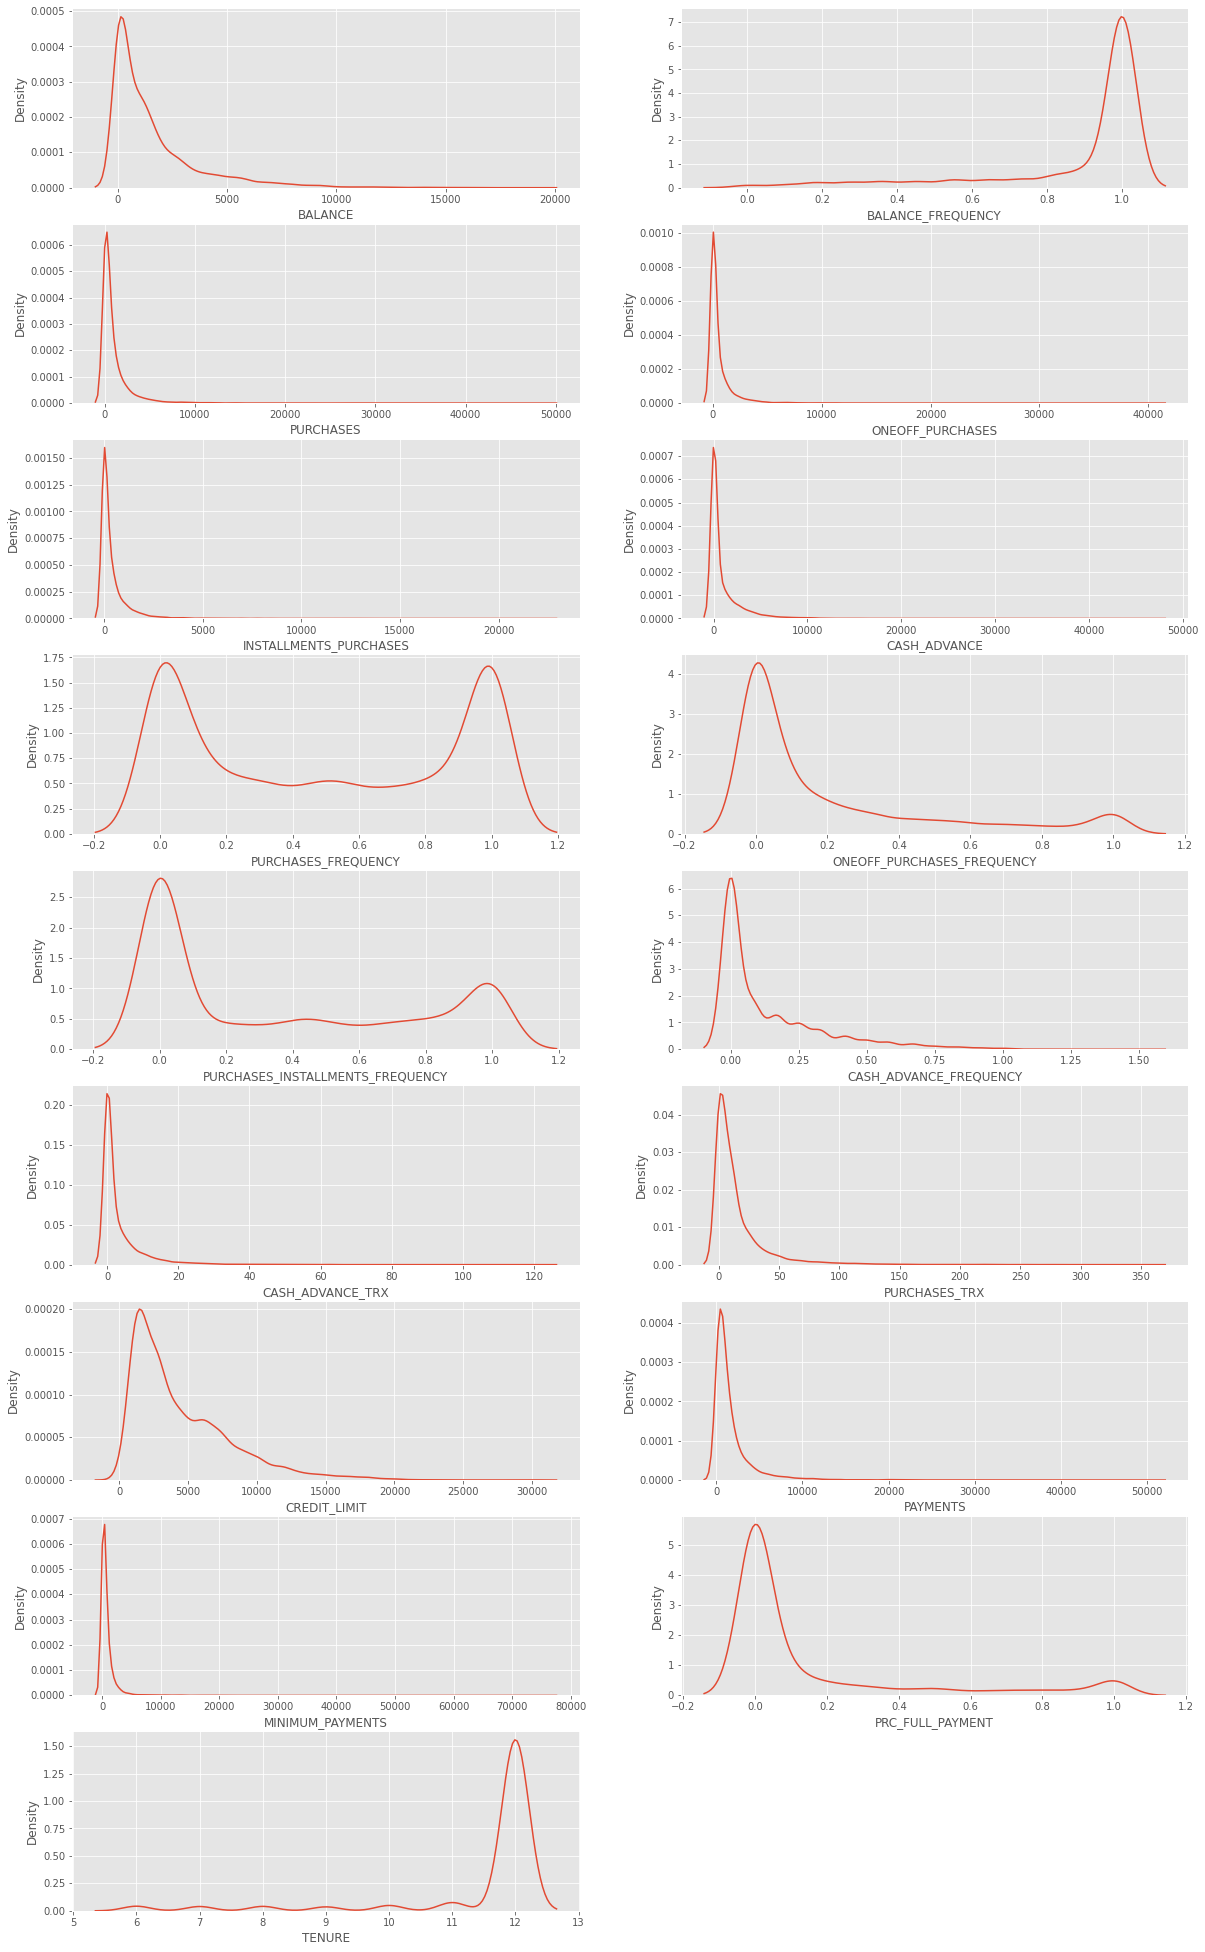

In [14]:
# visualize distribution of the data using kernal density plot
style.use('ggplot')
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

There is a lot of skewness and they are varied. It is kind of expected from datasets like these as there will always be a few customers who do very high amount of transactions.

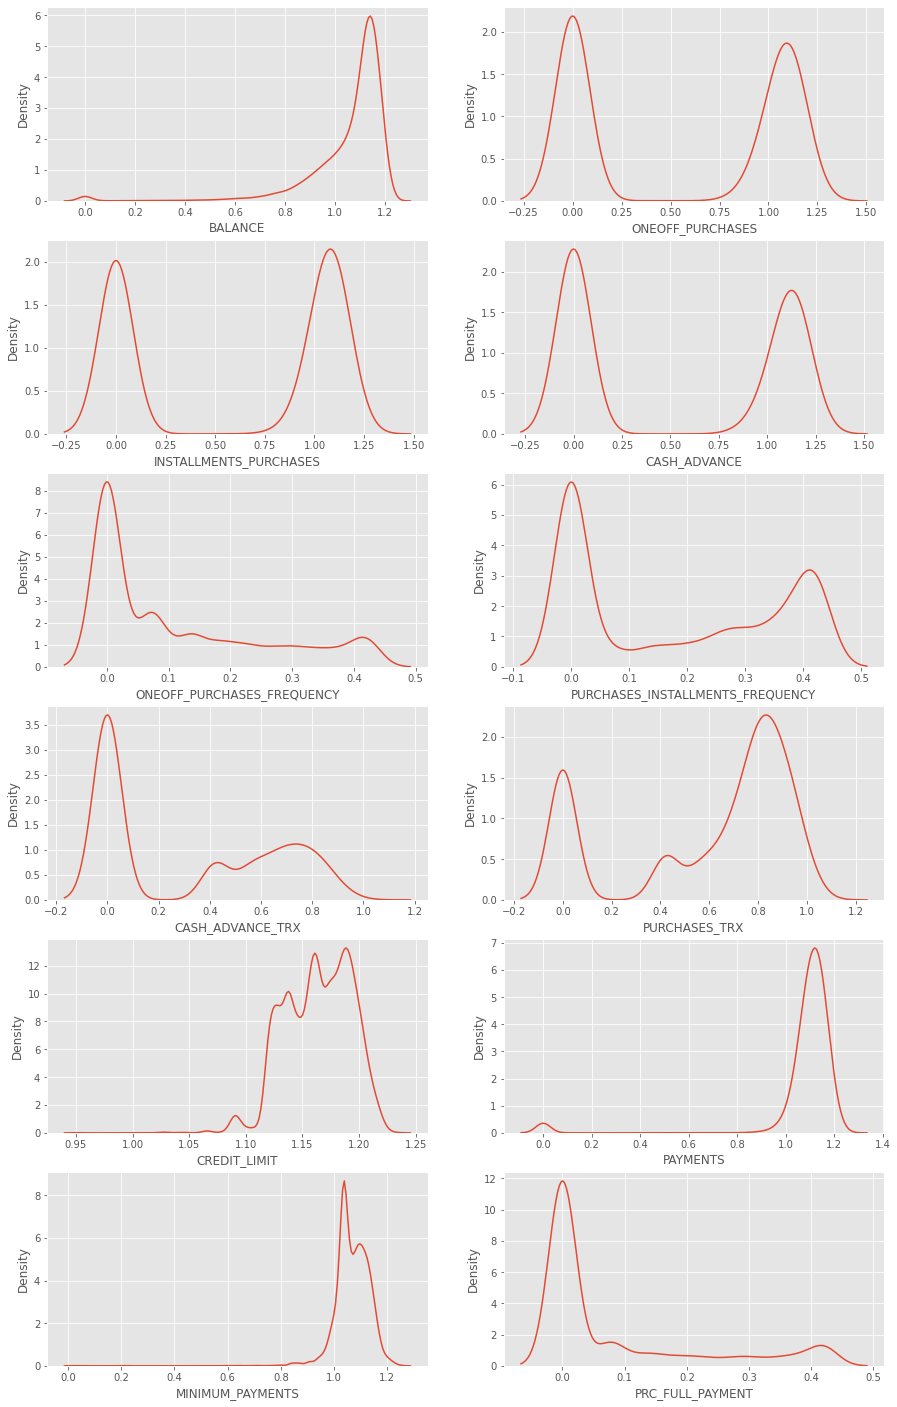

In [21]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
        'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX',
        'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

for col in cols:
    df[col] = np.log(1 + df[col])
    
plt.figure(figsize=(15,25))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

### Correlation

In [22]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.698744,0.143367,0.165631,-0.115232,0.370673,-0.037012,0.172657,-0.085593,0.326245,0.384402,-0.069104,0.187093,0.329771,0.763947,-0.253820,0.051902
BALANCE_FREQUENCY,0.698744,1.000000,0.133609,0.119296,0.078991,0.168067,0.230049,0.199251,0.154609,0.191735,0.191311,0.114571,0.092372,0.330219,0.497108,-0.097065,0.119524
PURCHASES,0.143367,0.133609,1.000000,0.369655,0.291615,-0.164889,0.392921,0.487923,0.309273,-0.119933,-0.160033,0.395564,0.282972,0.150119,0.115453,0.178206,0.086288
ONEOFF_PURCHASES,0.165631,0.119296,0.369655,1.000000,0.096932,-0.193753,0.325428,0.807799,0.069541,-0.109970,-0.172722,0.547175,0.237604,0.103986,0.063658,0.007836,0.087376
INSTALLMENTS_PURCHASES,-0.115232,0.078991,0.291615,0.096932,1.000000,-0.425713,0.763801,0.157664,0.911225,-0.295529,-0.402095,0.746050,0.069724,0.081214,-0.066062,0.270755,0.088619
CASH_ADVANCE,0.370673,0.168067,-0.164889,-0.193753,-0.425713,1.000000,-0.447455,-0.193529,-0.396237,0.722565,0.963374,-0.535117,0.052769,0.060997,0.345285,-0.336667,-0.092811
PURCHASES_FREQUENCY,-0.037012,0.230049,0.392921,0.325428,0.763801,-0.447455,1.000000,0.490675,0.862543,-0.307593,-0.423344,0.861853,0.110243,0.126872,-0.046125,0.317650,0.061451
ONEOFF_PURCHASES_FREQUENCY,0.172657,0.199251,0.487923,0.807799,0.157664,-0.193529,0.490675,1.000000,0.141566,-0.109480,-0.176975,0.557531,0.281469,0.131767,0.063184,0.118757,0.080237
PURCHASES_INSTALLMENTS_FREQUENCY,-0.085593,0.154609,0.309273,0.069541,0.911225,-0.396237,0.862543,0.141566,1.000000,-0.279239,-0.376058,0.727495,0.053549,0.102304,-0.049951,0.274720,0.071327
CASH_ADVANCE_FREQUENCY,0.326245,0.191735,-0.119933,-0.109970,-0.295529,0.722565,-0.307593,-0.109480,-0.279239,1.000000,0.839132,-0.358708,0.136917,0.099541,0.325401,-0.252468,-0.133408


<AxesSubplot:title={'center':'Credit card customer data'}>

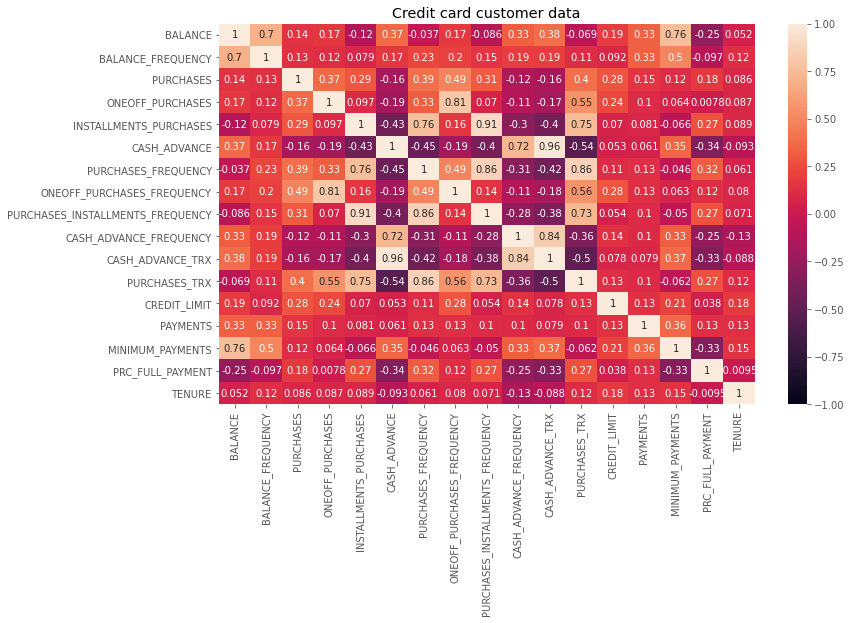

In [23]:
plt.figure(figsize=(12,7))

plt.title("Credit card customer data")

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

### Outlier detection

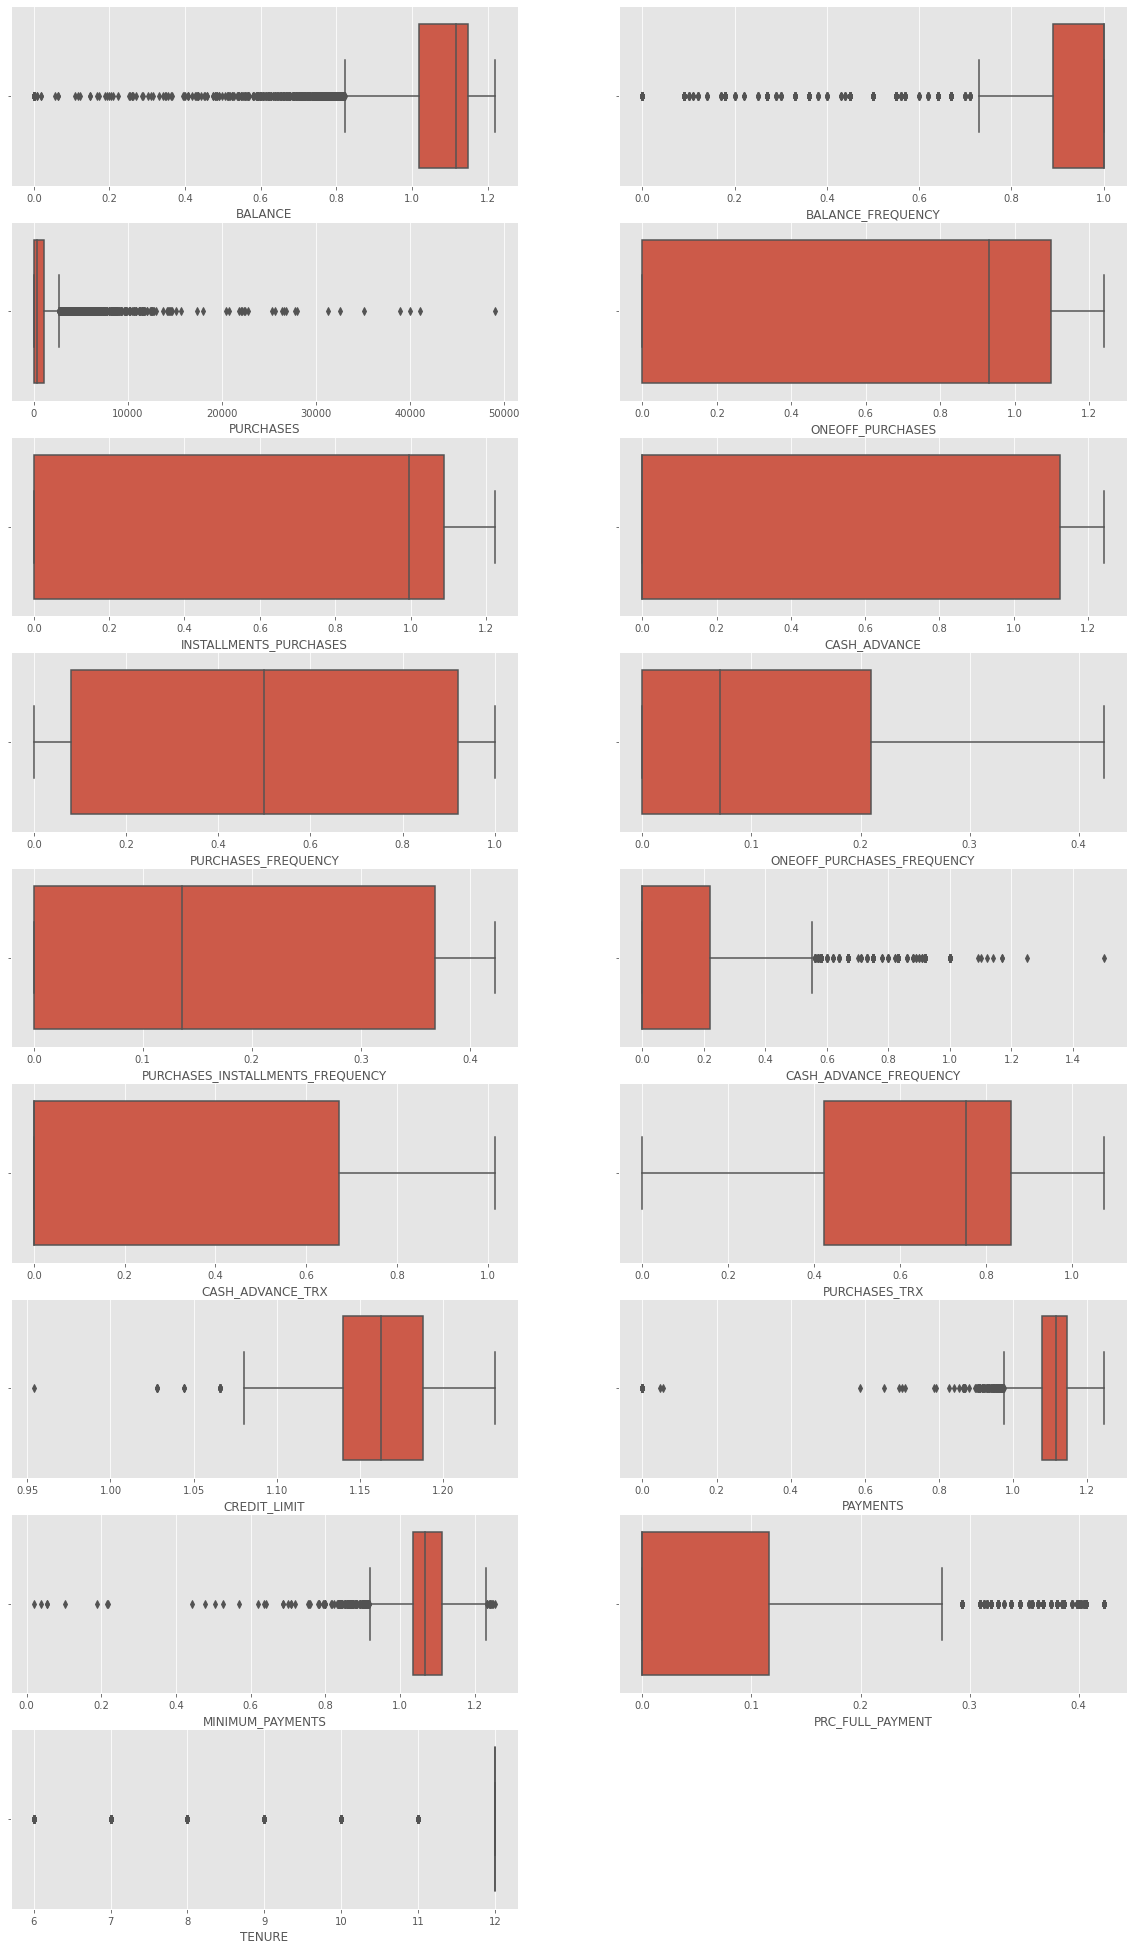

In [33]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.boxplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()